In [1]:
from agage_archive.io import read_nc, read_c

In [ ]:
aa = read_nc("cfc-11", "CGO", "GCMD")

aa.mf.plot()


In [5]:
df = read_c("CGO")

<Axes: >

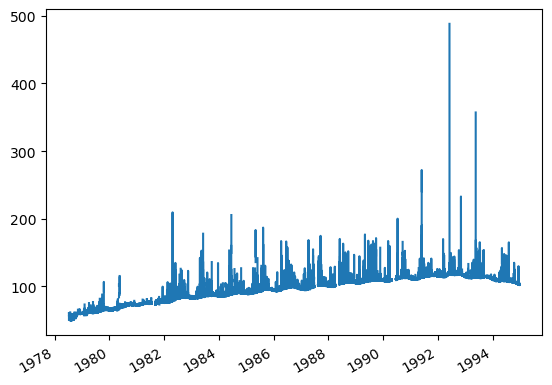

In [6]:
df["CH3CCl3"].plot()
